# **Importing Dependencies**

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Exploratory Data Analysis**

In [35]:
data = pd.read_csv('/content/gld_price_data.csv')

In [36]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


# **Info About Columns**
# Columns names meaning and definitions
* Date - date (MM/dd/yyyy format)
* SPX - stands for The Standard and Poor's 500 index, or simply the S&P 500. * It is a stock market index used for tracking the stock performance of 500 * of the largest companies listed on stock exchanges in USA

* GLD - gold price
* USO - stands for "The United States Oil Fund ® LP (USO)". It is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca
* SLV - silver price
* EUR/USD - Euro to US dollar exchange ratio

In [37]:
# number of rows and columns
data.shape

(2290, 6)

In [38]:
# some fundamental information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [39]:
# checking missing values
data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [40]:
# Calculation and Statistical measure of data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [41]:
# droping Date Columns
data = data.drop(['Date'], axis=1)

In [42]:
# Correlation method
corr = data.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

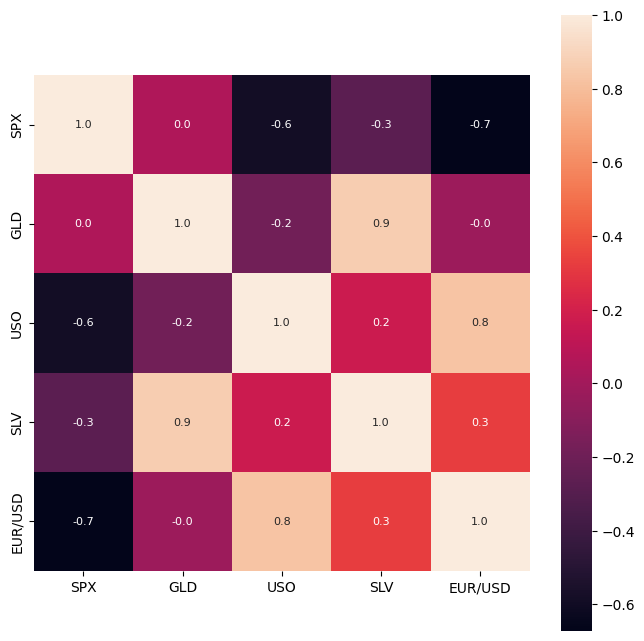

In [43]:
# build a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

In [44]:
# GLD correlation values
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-45-2fd453946f34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

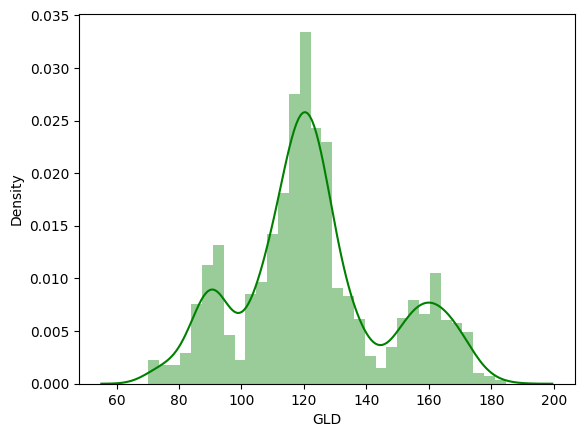

In [45]:
 # plot the distribution of the GLD Price
sns.distplot(data['GLD'],color='green')

In [46]:
# Splitting the dataset
x = data.drop(['GLD'],axis=1)
y = data['GLD']

In [47]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [48]:
y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [49]:
# train_test_split for data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [50]:
# Model Building
model = RandomForestRegressor()

In [51]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
# Making Prediction on data
y_pred = model.predict(x_test)

In [53]:
# R squared error
error_score = metrics.r2_score(y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.9905083273523101


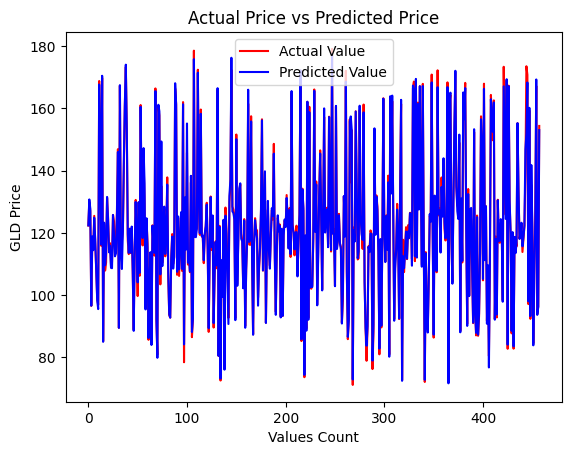

In [54]:
# comparing the actual and predicted values
y_test_list = list(y_test)
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values Count')
plt.ylabel('GLD Price')
plt.legend()
plt.show()